<br>
<br>

## 1. 텍스트 데이터 분석을 위한 라이브러리 설치 및 세팅

<br>

### 1-1) NLTK 설치

- Text Processing을 위한 라이브러리인 **nltk** library(Natural Language Toolkit)를 설치 및 세팅합니다.

In [ ]:
#!pip install nltk==3.4

In [12]:
import nltk

아래 명령어를 통해 download 대화상자를 열어 패키지를 다운로드 받아야 합니다.
<br>인터넷 속도 저하 시 매우 오래 걸리므로, 패키지 설치 경로만 확인한 다음 \[ (nltk, downloaded) nltk_data.zip ] 의 파일들을 복사합니다.
<br><br>경로 예시 : **"C:\Users\{컴퓨터 이름}\AppData\Roaming\nltk_data"**
<br>
**<p style='color:red;'>nltk_data 폴더 안에 corpora, taggers, tokenizers 폴더가 바로 위치하도록 복사해줘야 합니다.</p>**

In [ ]:
# nltk.download()  # 텍스트 데이터 처리를 위한 패키지 다운로더

# Download following packages
# Corpora : stopwords, wordnet
# Models : averaged_perceptron_tagger, maxnet_treebank_pos_tagger, punkt

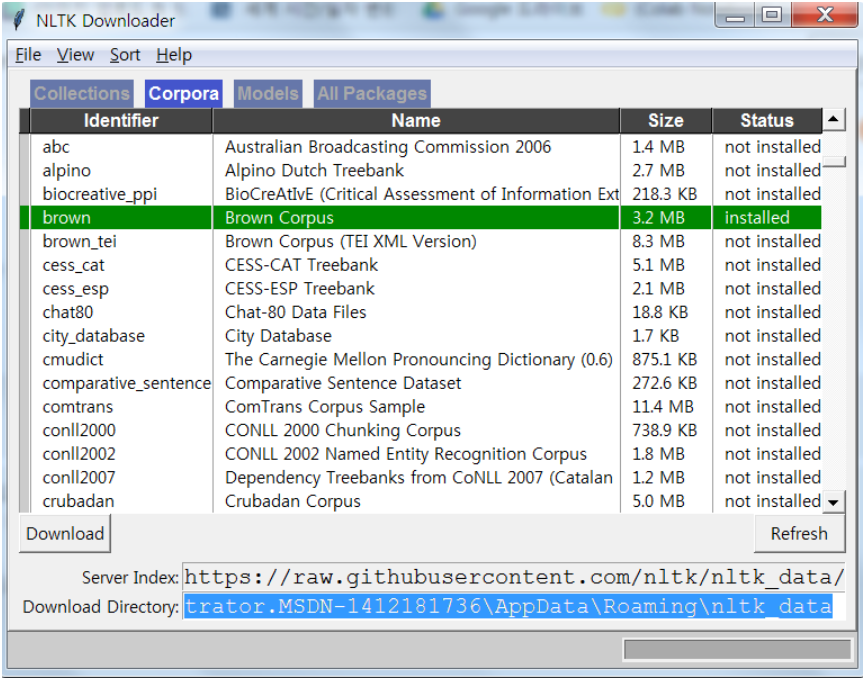

<br>

### 1-2) NLTK 테스트

In [ ]:
# 전처리하고자 하는 문장을 String 변수로 저장한다
sentence = 'NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.'

# 각 문장을 토큰화한 결과를 출력한다
nltk.word_tokenize(sentence)[:10]  # 문장을 '단어 수준에서' 토큰화해 출력한다 

<br>

### 1-3) Konlpy 설치

#### 1) Microsoft Build Tools 2015 를 설치합니다.

- 첨부해드린 **BuildTools_Full.exe** 파일을 실행하여 Microsoft Build Tools 2015 를 설치해줍니다.
<br><br>

#### 2) Java SE Development Kit (JDK) 를 설치합니다.

- 첨부해드린 **jdk-8u221-windows-x64.exe** 파일을 실행하여 JDK 를 설치해줍니다. (설정을 모두 그대로 유지한 채 설치해주셔야 합니다.)
- Mac OS 사용자는 http://j.mp/2lBBj1h 에서 OS 버전에 맞는 설치 파일을 다운로드하여 설치합니다.
<br><br>

#### 3) 설치가 완료되면 아래 2개의 셀을 차례대로 실행하여 JPype1과 konlpy를 설치해줍니다.

In [ ]:
# !pip install JPype1-0.6.3-cp37-cp37m-win_amd64.whl

# Mac OS 사용자는 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 에서 OS 버전에 맞는 .whl 파일을 다운로드합니다. 
# * JPype1 0.6.3 버전으로 선택합니다.
# * cp37 == Python 3.7.x 버전

In [ ]:
# !pip install konlpy==0.5.1

<br>
konlpy는 Java에 종속성이 있음

<br>

### 1-4) Konlpy 테스트

In [ ]:
# Twitter 라이브러리가 정상적으로 작동하는지 확인합니다.

# from konlpy.tag import Twitter
from konlpy.tag import Okt

#twitter = Twitter()

twitter = Okt()
malist = twitter.pos("아버지 가방에 들어가신다.", norm=True, stem=True) 

# norm은 자연어를 정규화하는 함수
# stem은 stemming: 단어의 어근을 찾는 역할을 해주는 함수

print(malist)

<br>
<br>

## 2. 크롤링 데이터 전처리

In [1]:
import numpy as np
import pandas as pd

<br>

### 2-1) 크롤링 데이터 불러오기

In [2]:
# df = pd.read_excel('result_190729_0552.xlsx', encoding='utf-8')
df = pd.read_excel('result_191213_1511.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"트럼프, 툰베리 '올해의 인물' 선정에 ""아주 웃긴다"" 막말",2019.12.12. 오후 11:59,"10대 청소년까지 노골적 공격…툰베리, 트럼프 트윗 가져다 재치 응수도널드 트럼프 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,연합뉴스
1,"문정인 ""트럼프, 재선에 도움된다면 北 ICBM에 군사적 응징""",2019.12.12. 오후 11:45,"""美군사행동 배제 못해…재선 도움될지 계산할것""""북미관계 진전 없다면 文정부도 생각...",https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
2,[설왕설래] 환경 소녀 툰베리,2019.12.12. 오후 11:28,“여러분은 빈말로 나의 꿈과 어린 시절을 훔쳤다. 어떻게 감히 그럴 수 있나.” ...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴
3,"문정인 ""美, 北과 협상서 진전 못 보면 文대통령 정책 바꿀 수밖에 없어""",2019.12.12. 오후 11:28,"""트럼프, 北 ICBM 쏘면 군사행동 가능성 배제못해""김연철 ""남북관계 공간 어떻게...",https://news.naver.com/main/read.nhn?mode=LSD&...,조선일보
4,[세계와우리] 비핵화보다 안보불안이 우려스럽다,2019.12.12. 오후 11:27,北·美간 입장차 갈등 국면으로 / 트럼프 대북정책은 ‘관리모드’ / 金 ‘새로운 길...,https://news.naver.com/main/read.nhn?mode=LSD&...,세계닷컴


In [7]:
articles = df['Article'].tolist() # tolist 함수는 list로 만들어주는 함수! 투-리스트.
len(articles)

print(articles)

['10대 청소년까지 노골적 공격…툰베리, 트럼프 트윗 가져다 재치 응수도널드 트럼프 미 대통령[UPI=연합뉴스]    (워싱턴=연합뉴스) 백나리 특파원 = 도널드 트럼프 미국 대통령은 12일(현지시간) 미 시사주간지 타임의 \'올해의 인물\'로 스웨덴의 16세 환경운동가 그레타 툰베리가 선정된 데 대해 막말을 쏟아냈다.    트럼프 대통령은 이날 오전 트위터에 툰베리의 선정에 대해 "아주 웃긴다"면서 "그레타는 자신의 분노조절 문제에 애써야 한다. 그러고 나서 친구랑 좋은 옛날 영화를 보러 가라"고 썼다.    그는 이어 "진정해라 그레타, 진정해!"라고 덧붙였다.    트럼프 대통령이 자신과 입장이 다른 이들을 상대로 막말을 하는 경우는 드물지 않지만 이날은 10대 청소년까지 그 대상으로 삼은 셈이다.     툰베리는 이날 트위터 자기소개를 "자신의 분노조절 문제에 애쓰는 10대 청소년. 현재 진정하고 친구와 좋은 옛날 영화를 보고 있음"이라고 바꿨다. 트럼프 대통령의 독설에 재치있게 응수한 것이다.기후변화를 부정하는 트럼프 대통령이 기후변화 대응의 시급성을 강조하는 툰베리를 걸고넘어진 건 처음이 아니다.    트럼프 대통령은 지난 9월 유엔총회 기후행동 정상회의에서 툰베리가 자신을 쏘아보는 사진이 화제가 된 후 트위터에 "툰베리는 밝고 멋진 미래를 고대하는 매우 행복한 어린 소녀처럼 보였다"며 에둘러 조롱했다.    그 때도 툰베리는 트위터 계정 자기소개를 "밝고 멋진 미래를 고대하는 매우 행복한 어린 소녀"로 바꾸며 응수했다.     전날 타임은 툰베리를 올해의 인물에 선정했다. 툰베리는 유엔총회에서 각국 정상들을 호되게 질책, 전 세계의 이목을 끌었다.     트럼프 대통령은 2015년에도 앙겔라 메르켈 독일 총리가 타임의 올해의 인물에 선정되자 메르켈 총리가 독일을 망치고 있다고 비난했다. 트럼프 대통령은 당시 최종 후보에 올랐다 떨어졌다. 타임 \'올해의 인물\'에 선정된 툰베리[AFP=연합뉴스]    nari@yna.co.kr▶확 달라진 연합뉴스

In [8]:
s = 'python is easy'
result = s.split()
print(result)

new_result = '___'.join(result)
print(new_result)

['python', 'is', 'easy']
python___is___easy


In [10]:
articles = ''.join(articles) # 리스트의 아이템들을 특정한 문자를 기준으로 이어 붙이기
# 원래 articles 였던 것을 string 형태로 바꿔준다!!!

articles[:1300]

'10대 청소년까지 노골적 공격…툰베리, 트럼프 트윗 가져다 재치 응수도널드 트럼프 미 대통령[UPI=연합뉴스]    (워싱턴=연합뉴스) 백나리 특파원 = 도널드 트럼프 미국 대통령은 12일(현지시간) 미 시사주간지 타임의 \'올해의 인물\'로 스웨덴의 16세 환경운동가 그레타 툰베리가 선정된 데 대해 막말을 쏟아냈다.    트럼프 대통령은 이날 오전 트위터에 툰베리의 선정에 대해 "아주 웃긴다"면서 "그레타는 자신의 분노조절 문제에 애써야 한다. 그러고 나서 친구랑 좋은 옛날 영화를 보러 가라"고 썼다.    그는 이어 "진정해라 그레타, 진정해!"라고 덧붙였다.    트럼프 대통령이 자신과 입장이 다른 이들을 상대로 막말을 하는 경우는 드물지 않지만 이날은 10대 청소년까지 그 대상으로 삼은 셈이다.     툰베리는 이날 트위터 자기소개를 "자신의 분노조절 문제에 애쓰는 10대 청소년. 현재 진정하고 친구와 좋은 옛날 영화를 보고 있음"이라고 바꿨다. 트럼프 대통령의 독설에 재치있게 응수한 것이다.기후변화를 부정하는 트럼프 대통령이 기후변화 대응의 시급성을 강조하는 툰베리를 걸고넘어진 건 처음이 아니다.    트럼프 대통령은 지난 9월 유엔총회 기후행동 정상회의에서 툰베리가 자신을 쏘아보는 사진이 화제가 된 후 트위터에 "툰베리는 밝고 멋진 미래를 고대하는 매우 행복한 어린 소녀처럼 보였다"며 에둘러 조롱했다.    그 때도 툰베리는 트위터 계정 자기소개를 "밝고 멋진 미래를 고대하는 매우 행복한 어린 소녀"로 바꾸며 응수했다.     전날 타임은 툰베리를 올해의 인물에 선정했다. 툰베리는 유엔총회에서 각국 정상들을 호되게 질책, 전 세계의 이목을 끌었다.     트럼프 대통령은 2015년에도 앙겔라 메르켈 독일 총리가 타임의 올해의 인물에 선정되자 메르켈 총리가 독일을 망치고 있다고 비난했다. 트럼프 대통령은 당시 최종 후보에 올랐다 떨어졌다. 타임 \'올해의 인물\'에 선정된 툰베리[AFP=연합뉴스]    nari@yna.co.kr▶확 달라진 연합뉴스 

<br>

### 2-2) 단어 정규화 및 어근화, 품사 태깅

In [14]:
# input data 에 품사를 태깅(tagging)합니다.
# 이 때, stem 및 norm 옵션의 기능은 다음과 같습니다.

# norm == 정규화(normalization)
# 한국어를 처리하는 예시입니닼ㅋㅋㅋ -> 한국어를 처리하는 예시입니다ㅋㅋ

# stem == 어근화(stemming)
# 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle

from konlpy.tag import Twitter

twitter = Twitter()
#twitter = Okt()

raw_pos_tagged = twitter.pos(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged

C:\Users\student\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('10', 'Number'),
 ('대다', 'Verb'),
 ('청소년', 'Noun'),
 ('까지', 'Josa'),
 ('노골', 'Noun'),
 ('적', 'Suffix'),
 ('공격', 'Noun'),
 ('…', 'Punctuation'),
 ('툰베리', 'Noun'),
 (',', 'Punctuation'),
 ('트럼프', 'Noun'),
 ('트윗', 'Noun'),
 ('가다', 'Verb'),
 ('재치', 'Noun'),
 ('응수', 'Noun'),
 ('도널드', 'Noun'),
 ('트럼프', 'Noun'),
 ('밉다', 'Adjective'),
 ('대통령', 'Noun'),
 ('[', 'Punctuation'),
 ('UPI', 'Alpha'),
 ('=', 'Punctuation'),
 ('연합뉴스', 'Noun'),
 (']', 'Punctuation'),
 ('(', 'Punctuation'),
 ('워싱턴', 'Noun'),
 ('=', 'Punctuation'),
 ('연합뉴스', 'Noun'),
 (')', 'Punctuation'),
 ('백', 'Modifier'),
 ('나리', 'Noun'),
 ('특파원', 'Noun'),
 ('=', 'Punctuation'),
 ('도널드', 'Noun'),
 ('트럼프', 'Noun'),
 ('미국', 'Noun'),
 ('대통령', 'Noun'),
 ('은', 'Josa'),
 ('12일', 'Number'),
 ('(', 'Punctuation'),
 ('현지', 'Noun'),
 ('시간', 'Noun'),
 (')', 'Punctuation'),
 ('밉다', 'Adjective'),
 ('시사', 'Noun'),
 ('주간지', 'Noun'),
 ('타임', 'Noun'),
 ('의', 'Josa'),
 ("'", 'Punctuation'),
 ('올해', 'Noun'),
 ('의', 'Josa'),
 ('인물', 'Noun'),
 ("'", 'Pu

<br>

### 2-3) 단어 등장 빈도 카운팅

In [15]:
raw_pos_tagged[0]

('10', 'Number')

In [16]:
# 정규화 및 어근화를 마치고 품사 태깅까지 마친 상태에서,
# 조사, 어미, 구두점을 제외한 나머지 단어들을 모두 word_cleaned 리스트에 담습니다.
# 이 때에는 여러번 나온 단어들도 복수 허용되어 여러번 리스트에 담기게 됩니다.

# 유의미한 의미를 갖고 있지 않은 단어를 제외할 수 있습니다.
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['10',
 '대다',
 '청소년',
 '노골',
 '공격',
 '툰베리',
 '트럼프',
 '트윗',
 '가다',
 '재치',
 '응수',
 '도널드',
 '트럼프',
 '밉다',
 '대통령',
 'UPI',
 '연합뉴스',
 '워싱턴',
 '연합뉴스',
 '나리',
 '특파원',
 '도널드',
 '트럼프',
 '미국',
 '대통령',
 '12일',
 '현지',
 '시간',
 '밉다',
 '시사',
 '주간지',
 '타임',
 '올해',
 '인물',
 '스웨덴',
 '16',
 '환경운동가',
 '그레타',
 '툰베리',
 '선정',
 '대해',
 '막말',
 '쏟아내다',
 '트럼프',
 '대통령',
 '오전',
 '트위터',
 '툰베리',
 '선정',
 '대해',
 '아주',
 '웃기다',
 '면서',
 '그레타',
 '자신',
 '분노조절',
 '문제',
 '애쓰다',
 '나서다',
 '친구',
 '좋다',
 '옛날',
 '영화',
 '보다',
 '가라',
 '써다',
 '진정하다',
 '그레타',
 '진정하다',
 '덧붙이다',
 '트럼프',
 '대통령',
 '자신',
 '입장',
 '다른',
 '상대로',
 '막말',
 '경우',
 '드물다',
 '10',
 '대다',
 '청소년',
 '대상',
 '삼은',
 '툰베리',
 '트위터',
 '자기',
 '소개',
 '자신',
 '분노조절',
 '문제',
 '애쓰다',
 '10',
 '대다',
 '청소년',
 '현재',
 '진정하다',
 '친구',
 '좋다',
 '옛날',
 '영화',
 '보고',
 '바꾸다',
 '트럼프',
 '대통령',
 '독설',
 '재치',
 '응수',
 '기후변화',
 '부정',
 '트럼프',
 '대통령',
 '기후변화',
 '대응',
 '시급',
 '강조',
 '툰베리',
 '걸다',
 '넘어지다',
 '처음',
 '트럼프',
 '대통령',
 '지난',
 '9월',
 '유엔',
 '총회',
 '기후',
 '행동',
 '정상',
 '회의',
 '툰베리',
 '자신',
 '쏘아보

In [ ]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

In [17]:
# # 위 cell에서의 작업과 동일한 작업을 아래의 코드로 대체할 수 있습니다.

from collections import Counter
result = Counter(word_cleaned) # counter를 적용하면 dictionary 형태로 반환한다.
word_dic = dict(result)
word_dic

{'10': 8,
 '대다': 7,
 '청소년': 4,
 '노골': 1,
 '공격': 2,
 '툰베리': 72,
 '트럼프': 86,
 '트윗': 5,
 '가다': 18,
 '재치': 3,
 '응수': 7,
 '도널드': 27,
 '밉다': 74,
 '대통령': 108,
 'UPI': 1,
 '연합뉴스': 21,
 '워싱턴': 3,
 '나리': 1,
 '특파원': 4,
 '미국': 157,
 '12일': 20,
 '현지': 16,
 '시간': 16,
 '시사': 12,
 '주간지': 9,
 '타임': 23,
 '올해': 28,
 '인물': 21,
 '스웨덴': 12,
 '16': 11,
 '환경운동가': 4,
 '그레타': 22,
 '선정': 24,
 '대해': 31,
 '막말': 4,
 '쏟아내다': 1,
 '오전': 2,
 '트위터': 18,
 '아주': 7,
 '웃기다': 1,
 '면서': 2,
 '자신': 16,
 '분노조절': 6,
 '문제': 35,
 '애쓰다': 3,
 '나서다': 8,
 '친구': 9,
 '좋다': 10,
 '옛날': 3,
 '영화': 7,
 '보다': 32,
 '가라': 1,
 '써다': 3,
 '진정하다': 10,
 '덧붙이다': 2,
 '입장': 18,
 '다른': 7,
 '상대로': 1,
 '경우': 16,
 '드물다': 1,
 '대상': 3,
 '삼은': 1,
 '자기': 6,
 '소개': 7,
 '현재': 18,
 '보고': 10,
 '바꾸다': 14,
 '독설': 1,
 '기후변화': 8,
 '부정': 3,
 '대응': 16,
 '시급': 1,
 '강조': 7,
 '걸다': 2,
 '넘어지다': 1,
 '처음': 4,
 '지난': 25,
 '9월': 16,
 '유엔': 22,
 '총회': 4,
 '기후': 30,
 '행동': 24,
 '정상': 23,
 '회의': 34,
 '쏘아보다': 1,
 '사진': 2,
 '화제': 2,
 '밝다': 8,
 '멋지다': 8,
 '미래': 15,
 '고대': 4,
 '매우': 7,

#### -> You can preceed to [3. 워드클라우드 만들기] from here.

In [18]:
word_dic.items()

dict_items([('10', 8), ('대다', 7), ('청소년', 4), ('노골', 1), ('공격', 2), ('툰베리', 72), ('트럼프', 86), ('트윗', 5), ('가다', 18), ('재치', 3), ('응수', 7), ('도널드', 27), ('밉다', 74), ('대통령', 108), ('UPI', 1), ('연합뉴스', 21), ('워싱턴', 3), ('나리', 1), ('특파원', 4), ('미국', 157), ('12일', 20), ('현지', 16), ('시간', 16), ('시사', 12), ('주간지', 9), ('타임', 23), ('올해', 28), ('인물', 21), ('스웨덴', 12), ('16', 11), ('환경운동가', 4), ('그레타', 22), ('선정', 24), ('대해', 31), ('막말', 4), ('쏟아내다', 1), ('오전', 2), ('트위터', 18), ('아주', 7), ('웃기다', 1), ('면서', 2), ('자신', 16), ('분노조절', 6), ('문제', 35), ('애쓰다', 3), ('나서다', 8), ('친구', 9), ('좋다', 10), ('옛날', 3), ('영화', 7), ('보다', 32), ('가라', 1), ('써다', 3), ('진정하다', 10), ('덧붙이다', 2), ('입장', 18), ('다른', 7), ('상대로', 1), ('경우', 16), ('드물다', 1), ('대상', 3), ('삼은', 1), ('자기', 6), ('소개', 7), ('현재', 18), ('보고', 10), ('바꾸다', 14), ('독설', 1), ('기후변화', 8), ('부정', 3), ('대응', 16), ('시급', 1), ('강조', 7), ('걸다', 2), ('넘어지다', 1), ('처음', 4), ('지난', 25), ('9월', 16), ('유엔', 22), ('총회', 4), ('기후', 30), ('행동', 24), ('정상', 23),

In [19]:
# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬합니다.

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('미국', 157),
 ('대통령', 108),
 ('북한', 93),
 ('트럼프', 86),
 ('밉다', 74),
 ('툰베리', 72),
 ('협상', 69),
 ('없다', 58),
 ('우리', 51),
 ('무역', 42),
 ('정부', 41),
 ('중국', 37),
 ('세계', 36),
 ('문제', 35),
 ('한국', 35),
 ('뉴스', 35),
 ('회의', 34),
 ('기자', 33),
 ('보다', 32),
 ('대해', 31),
 ('기후', 30),
 ('상황', 29),
 ('올해', 28),
 ('외교', 28),
 ('도널드', 27),
 ('장관', 27),
 ('지난', 25),
 ('크다', 25),
 ('대한', 25),
 ('선정', 24),
 ('행동', 24),
 ('북미', 24),
 ('관세', 24),
 ('타임', 23),
 ('정상', 23),
 ('안보', 23),
 ('때문', 23),
 ('홍콩', 23),
 ('그레타', 22),
 ('유엔', 22),
 ('정책', 22),
 ('밝히다', 22),
 ('새롭다', 22),
 ('오다', 22),
 ('연합뉴스', 21),
 ('인물', 21),
 ('무단', 21),
 ('배포', 21),
 ('금지', 21),
 ('합의', 21),
 ('12일', 20),
 ('특보', 20),
 ('전망', 20),
 ('서울', 19),
 ('도발', 19),
 ('가다', 18),
 ('트위터', 18),
 ('입장', 18),
 ('현재', 18),
 ('군사', 18),
 ('생각', 18),
 ('특별', 18),
 ('가능성', 18),
 ('같다', 18),
 ('미군', 18),
 ('금리', 18),
 ('가장', 17),
 ('이후', 17),
 ('현지', 16),
 ('시간', 16),
 ('자신', 16),
 ('경우', 16),
 ('대응', 16),
 ('9월', 16),
 ('구독', 16),
 ('관계', 16)

In [20]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같습니다.

# ('보람', 517),
for word, count in sorted_word_dic[:50]:
    print("{0}({1})".format(word, count), end=" ")

미국(157) 대통령(108) 북한(93) 트럼프(86) 밉다(74) 툰베리(72) 협상(69) 없다(58) 우리(51) 무역(42) 정부(41) 중국(37) 세계(36) 문제(35) 한국(35) 뉴스(35) 회의(34) 기자(33) 보다(32) 대해(31) 기후(30) 상황(29) 올해(28) 외교(28) 도널드(27) 장관(27) 지난(25) 크다(25) 대한(25) 선정(24) 행동(24) 북미(24) 관세(24) 타임(23) 정상(23) 안보(23) 때문(23) 홍콩(23) 그레타(22) 유엔(22) 정책(22) 밝히다(22) 새롭다(22) 오다(22) 연합뉴스(21) 인물(21) 무단(21) 배포(21) 금지(21) 합의(21) 

<br>

### 2-4) 단어 등장 빈도 시각화

In [21]:
# matplot 에서 한글을 표시하기 위한 설정입니다.
# 맑은고딕 대신 나눔고딕 폰트를 사용하려면 [나눔고딕파일] 폴더의 파일들을 복사하여, C drive -> Windows -> Fonts 폴더 안에 붙여넣기합니다.

import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 위치를 넣어주세요 (위에서 나눔고딕 파일을 해당 경로에 복사붙여넣기 했을 경우 그대로 실행하셔도 무방합니다.)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

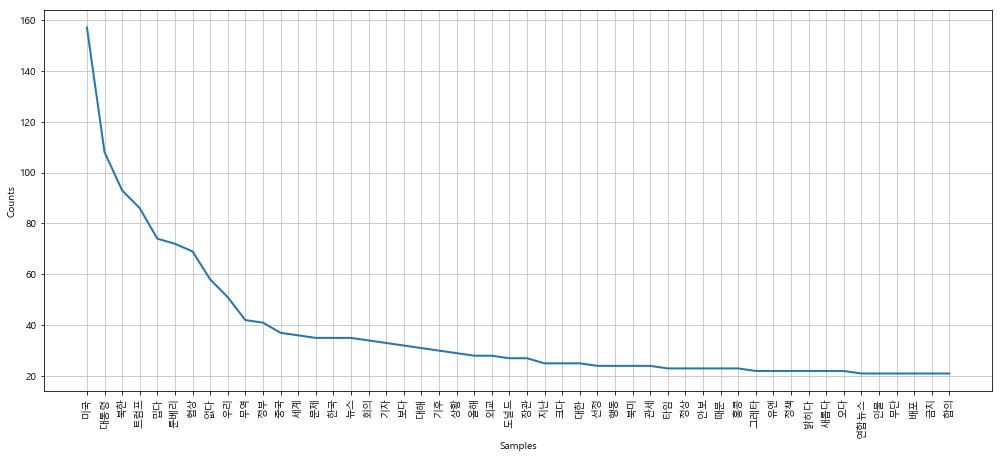

In [22]:
# nltk 라이브러리는 단어의 등장 빈도를 더욱 쉽게 셀 수 있는 .Text() 함수를 제공합니다.

word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(17, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

<br>

### 2-5) 단어 등장 빈도 시각화 (막대그래프)

In [23]:
# 막대그래프로의 시각화는 NLTK 의 함수만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화를 진행합니다.

word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution
word_frequency

FreqDist({'미국': 157, '대통령': 108, '북한': 93, '트럼프': 86, '밉다': 74, '툰베리': 72, '협상': 69, '없다': 58, '우리': 51, '무역': 42, ...})

In [24]:
# 왜 순서가? 이럴까? 

df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 
df.head()

#df = pd.DataFrame(list(word_frequency.keys()), word_frequency.values()) 
#df.head()

,0
10,8
대다,7
청소년,4
노골,1
공격,2


In [25]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:50]
#result

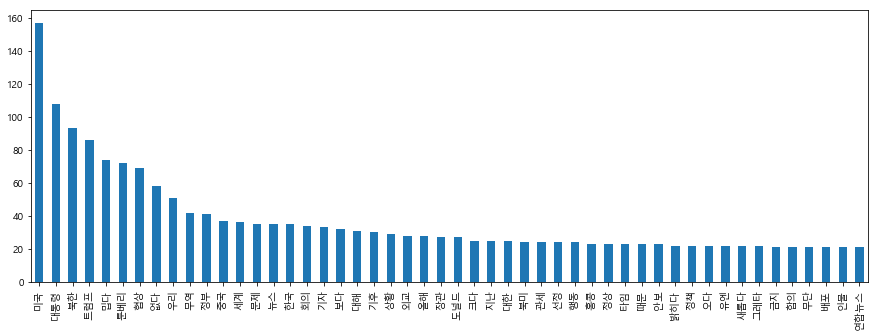

In [26]:
# 데이터프레임에 담긴 단어 및 빈도 수를 막대그래프로 표현하기 위한 코드입니다.

result.plot(kind='bar', legend=False, figsize=(15,5)) # 'bar' graph
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.
# 기타 그래프 관련 옵션은 https://goo.gl/YNejGt 에서 확인하고 적용하실 수 있습니다.

plt.show()

<br>
<br>

## 3. 워드클라우드 만들기 

- 워드클라우드를 만들기에 앞서 WordCloud library 를 설치해주어야 합니다.

- [ 시작메뉴 -  모든 프로그램 - Anaconda 3 - **Anaconda Prompt** ] 에서 아래 명령어를 입력합니다. (우클릭 후 **"관리자권한으로 실행"**)
<br>**conda install -c https://conda.anaconda.org/conda-forge wordcloud==1.5.0**

In [31]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

#### 3-1) WordCloud - 하얀 바탕

In [52]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있습니다.
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [53]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

<Figure size 1080x1080 with 0 Axes>

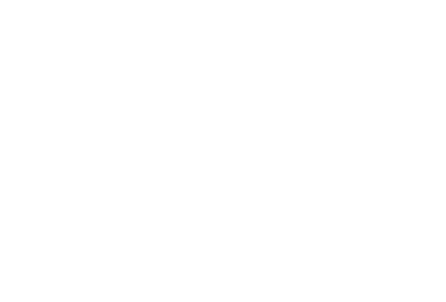

In [54]:
# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.show(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-2) WordCloud - 하얀 바탕, 최대 단어 갯수 50

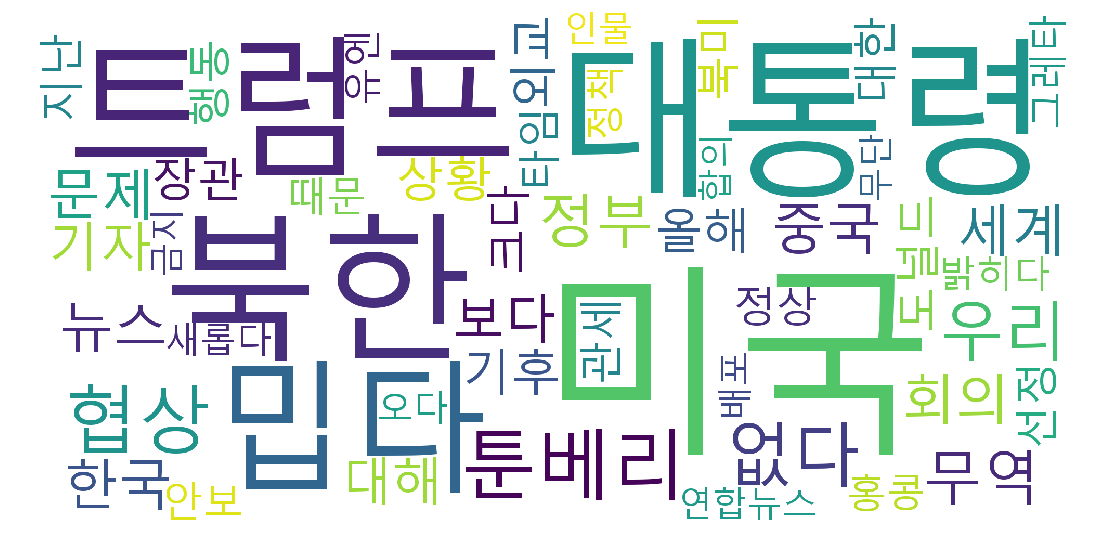

In [62]:
# max_words 라는 옵션을 통해 워드클라우드에 담길 단어의 최대 갯수를 제한할 수 있습니다.
# 기본적으로 옵션을 지정하지 않으면 200 으로 default 값이 지정되어 있습니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=50, # max words
                       width=2000, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)


# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-3) WordCloud - 검정 바탕, 최대 폰트 사이즈 100

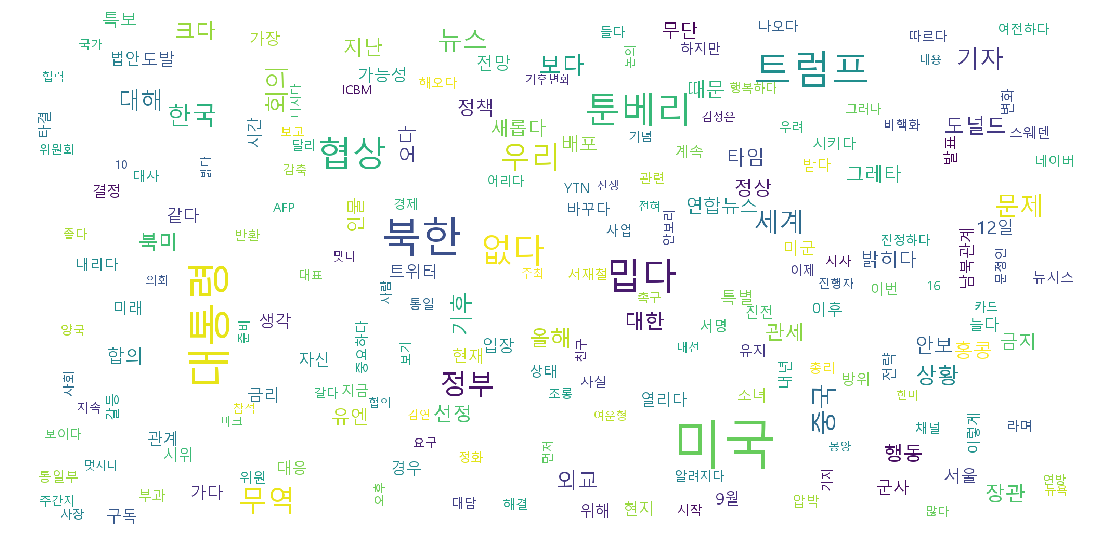

In [69]:
# max_font_size 라는 옵션을 통해 최대 글자 크기를 제한할 수 있습니다.

# 아래 옵션 중 어느 것을 지워줘야 바탕이 검정(default)이 될까요?
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       background_color='white', 
                       max_font_size=100).generate_from_frequencies(word_dic) # Max font-size

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-4) WordCloud - masking 적용 (특정 그림 테두리 내에 워드클라우드 그리기)

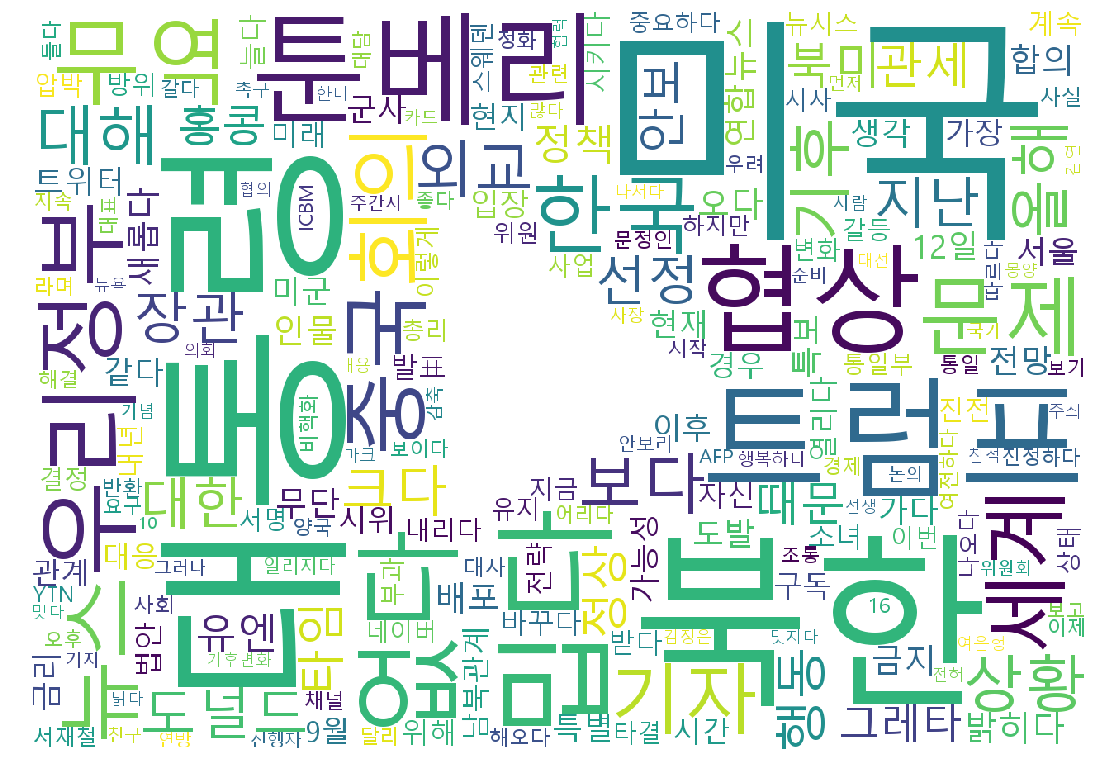

In [67]:
youtube_coloring = np.array(Image.open("youtube_mask.jpg"))

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       mask=youtube_coloring, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-5) WordCloud - masking 적용 (특정 그림 테두리 내에 워드클라우드 그리기 & 그림 색상으로 전체 색상 통일)

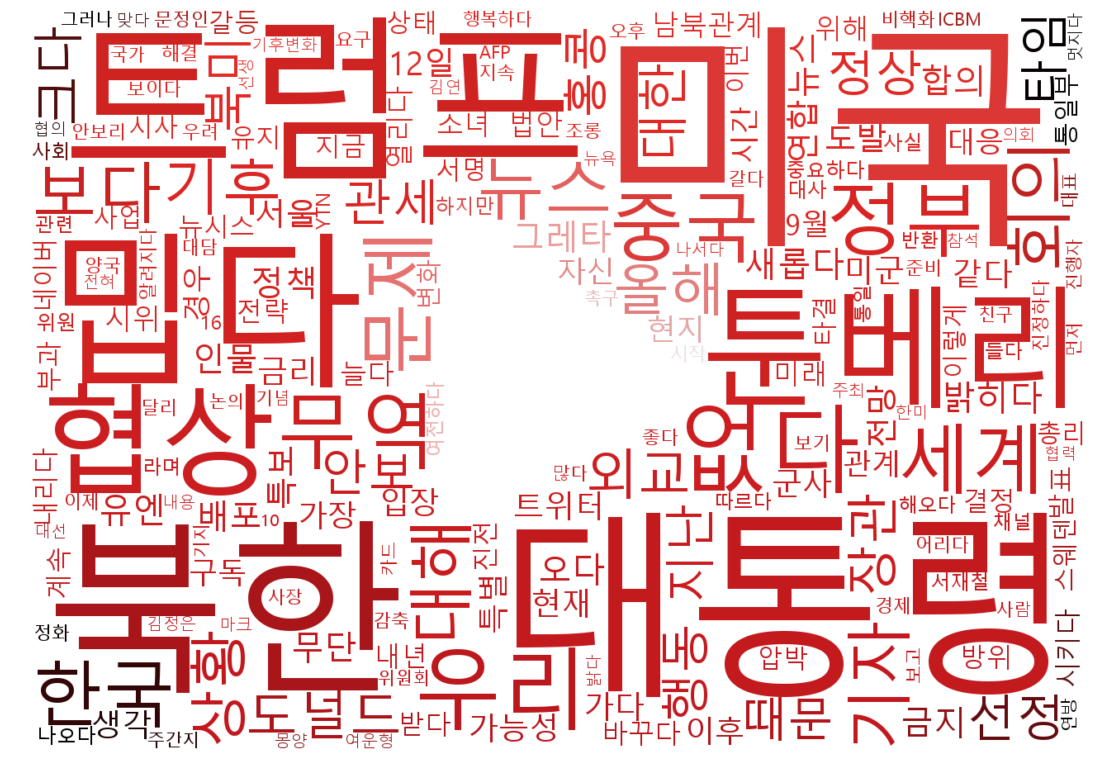

In [74]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

youtube_coloring = np.array(Image.open("youtube_mask.jpg"))
image_colors = ImageColorGenerator(youtube_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=youtube_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
#plt.imshow(word_cloud.?(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>
<br>

#### 3-6) 워드클라우드를 이미지 파일로 저장하기 

In [75]:
# 아래 코드를 실행하시면 jupyter notebook 과 동일한 폴더에 워드클라우드가 이미지 파일로 저장된 것을 확인하실 수 있습니다.

word_cloud.to_file("word_cloud_completed.png") # Save "to file"

<br>

#### 3-7) WordCloud 요약 (완성본)

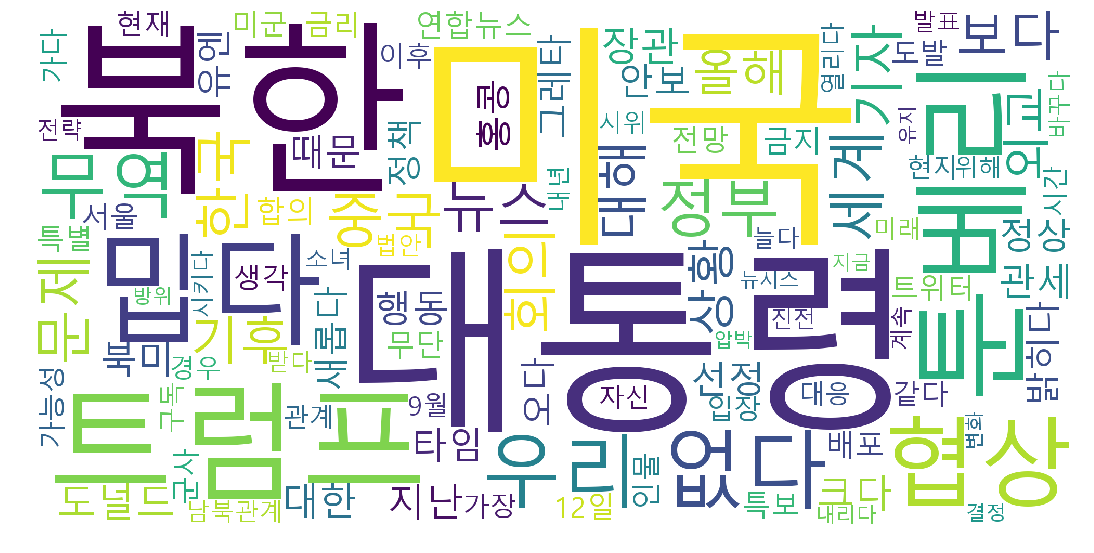

In [85]:
# 아래 옵션들을 원하시는대로 지정하셔서 가장 마음에 드는 워드클라우드를 활용하시면 됩니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # 한글 폰트 변경
                       width=2000, height=1000, # 실제 워드클라우드 크기 변경 (해상도 변경)
                       max_words=100, # 최대로 보여질 단어 수 제한
                       background_color='white', # 바탕색 지정 (주석처리할 경우 검정으로 변경됨)
#                        max_font_size=100, # 최대 단어 크기 제한
                      ).generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15)) # Jupyter notebook 상에서 보여지는 워드클라우드 크기 지정 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("word_cloud_7 (white, squared, max100).png")

<br>

#### Appendix) Try other masks!

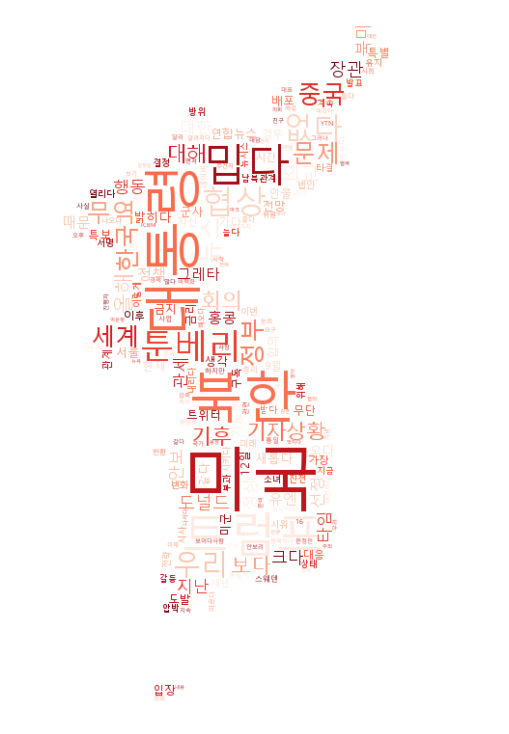

In [87]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

korea_coloring = np.array(Image.open("other masks/korea_mask.jpg"))
#image_colors = ImageColorGenerator(korea_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       width=1600, height=1000, 
                       mask=korea_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
# plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("other_masks_applied.png")